**IMPORTING NECESSARY LIBRARIES**

In [258]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import os
import json

**LOADING DATASET**

In [259]:
# We only use the first 100,000 data in this assignment
users = []
numOfClusters = 3
with open('/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
users_df = pd.DataFrame(users)
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5


**PRE-PROCESSING**

In [260]:
#Pre-processing

#count the number of friends
users_df.friends = users_df.friends.str.split(',')
users_df.friends = users_df.friends.apply(lambda x : len(x))
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",99,5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,1152,4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,15,0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,525,5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",231,39,...,1,0,0,1,16,57,80,80,25,5


In [261]:
#Pre-processing

#Scale some columns as you may need (e.g. the range of compliments is much greater than average stars, so you might want to take log of those columns)
summationOfColumnsList = ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']
users_df['compliment_hot'] = np.log(1 + users_df.compliment_hot)
users_df['compliment_more'] = np.log(1 + users_df.compliment_more)
users_df['compliment_profile'] = np.log(1 + users_df.compliment_profile)
users_df['compliment_cute'] = np.log(1 + users_df.compliment_cute)
users_df['compliment_list'] = np.log(1 + users_df.compliment_list)
users_df['compliment_note'] = np.log(1 + users_df.compliment_note)
users_df['compliment_plain'] = np.log(1 + users_df.compliment_plain)
users_df['compliment_cool'] = np.log(1 + users_df.compliment_cool)
users_df['compliment_funny'] = np.log(1 + users_df.compliment_funny)
users_df['compliment_writer'] = np.log(1 + users_df.compliment_writer)
users_df['compliment_photos'] = np.log(1 + users_df.compliment_photos)
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017",99,5,...,0.000000,0.0,0.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,1152,4,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,15,0,...,0.000000,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,525,5,...,0.000000,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018",231,39,...,0.693147,0.0,0.0,0.693147,2.833213,4.060443,4.394449,4.394449,3.258097,1.791759


In [262]:
#Pre-processing

#convert elite to total number of years so far
users_df.elite = users_df.elite.str.split(',')
users_df.elite = users_df.elite.apply(lambda x: len(x))
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,3,99,5,...,0.000000,0.0,0.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,1,1152,4,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,1,15,0,...,0.000000,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,1,525,5,...,0.000000,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,4,231,39,...,0.693147,0.0,0.0,0.693147,2.833213,4.060443,4.394449,4.394449,3.258097,1.791759


In [263]:
#Pre-processing

#Extracting total number of days so far using the yelping_since column
users_df['yelping_since_days'] = (pd.to_datetime('today') - pd.to_datetime(users_df['yelping_since'])).dt.days
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,3,99,5,...,0.0,0.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,2216
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,1,1152,4,...,0.0,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,2445
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,1,15,0,...,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,2221
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,1,525,5,...,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,1991
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,4,231,39,...,0.0,0.0,0.693147,2.833213,4.060443,4.394449,4.394449,3.258097,1.791759,2202


In [264]:
#Pre-processing

#Deleting unnecessary columns after pre-processing on necessary columns has been done
del users_df['name']
del users_df['user_id']
del users_df['yelping_since']
users_df.head()

,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days
0,95,84,17,25,3,99,5,4.03,1.098612,0.000000,0.0,0.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,2216
1,33,48,22,16,1,1152,4,3.63,0.693147,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,2445
2,16,28,8,10,1,15,0,3.71,0.000000,0.000000,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,2221
3,17,30,4,14,1,525,5,4.85,0.693147,0.000000,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,1991
4,361,1114,279,665,4,231,39,4.08,3.367296,0.693147,0.0,0.0,0.693147,2.833213,4.060443,4.394449,4.394449,3.258097,1.791759,2202


**STANDARDIZING THE DATA**

In [265]:
# Standardize the data so that we can import to PCA
columnsOrigin = users_df.columns
sc = StandardScaler()
users_train_df_numpy = sc.fit_transform(users_df)
users_train_df = pd.DataFrame(users_train_df_numpy)
users_train_df.columns = columnsOrigin
users_train_df.head()

,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days
0,0.061809,-0.094222,-0.092866,-0.093980,1.033783,-0.044453,-0.055749,0.315149,0.474036,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.090523,-0.025012,-0.025012,0.507025,-0.395417,-0.416505
1,-0.246202,-0.120816,-0.087556,-0.101810,-0.346066,3.640265,-0.081718,-0.229831,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,-0.639834,-0.025012,-0.025012,-0.523224,-0.395417,-0.163882
2,-0.330657,-0.135591,-0.102425,-0.107031,-0.346066,-0.338391,-0.185594,-0.120835,-0.478313,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.639834,-0.556436,-0.556436,-0.523224,-0.395417,-0.410989
3,-0.325689,-0.134113,-0.106673,-0.103551,-0.346066,1.446230,-0.055749,1.432358,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,0.230803,-0.556436,-0.556436,0.126791,-0.395417,-0.664714
4,1.383275,0.666668,0.185394,0.462884,1.723708,0.417449,0.827192,0.383272,2.440678,0.527654,-0.297977,-0.271144,1.559345,1.936281,2.578018,2.812709,2.812709,2.532133,1.634765,-0.431949


In [266]:
# Conclude the attributes to different groups according to covariance matrix and your understanding to the data
# Covariance matrix
cov = pd.DataFrame(users_train_df, columns=users_df.columns).cov()
cov.style.background_gradient(cmap = 'coolwarm')

,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days
review_count,1.00001,0.647586,0.54104,0.568926,0.678168,0.500225,0.634552,-0.0081032,0.656906,0.667183,0.66032,0.579015,0.596166,0.67775,0.680614,0.671647,0.671647,0.688079,0.64799,0.288724
useful,0.647586,1.00001,0.966984,0.990715,0.400179,0.608193,0.807964,-0.000856281,0.510592,0.538624,0.614071,0.55006,0.590123,0.484119,0.487976,0.486974,0.486974,0.507945,0.570274,0.142411
funny,0.54104,0.966984,1.00001,0.979286,0.318752,0.547706,0.758878,-0.000784265,0.439689,0.473233,0.55735,0.508525,0.549604,0.408362,0.40982,0.41111,0.41111,0.429688,0.495067,0.115101
cool,0.568926,0.990715,0.979286,1.00001,0.335083,0.575788,0.770704,0.00535334,0.459548,0.488041,0.572631,0.515882,0.553627,0.425242,0.429445,0.431855,0.431855,0.449123,0.526036,0.112017
elite,0.678168,0.400179,0.318752,0.335083,1.00001,0.401419,0.464652,0.00890615,0.741061,0.694876,0.654505,0.568088,0.557913,0.712781,0.720518,0.747371,0.747371,0.765471,0.645348,0.29227
friends,0.500225,0.608193,0.547706,0.575788,0.401419,1.00001,0.746666,0.0440033,0.522617,0.510359,0.572134,0.543777,0.506187,0.487847,0.504687,0.504682,0.504682,0.501904,0.563796,0.112786
fans,0.634552,0.807964,0.758878,0.770704,0.464652,0.746666,1.00001,0.0105854,0.561818,0.571748,0.639323,0.620469,0.619878,0.532363,0.53819,0.535951,0.535951,0.552093,0.611695,0.167147
average_stars,-0.0081032,-0.000856281,-0.000784265,0.00535334,0.00890615,0.0440033,0.0105854,1.00001,0.0176823,-0.00784199,0.0034781,0.00427607,-0.00270081,-0.0347327,-0.00463915,0.0159824,0.0159824,0.00446279,0.0250143,-0.0239303
compliment_hot,0.656906,0.510592,0.439689,0.459548,0.741061,0.522617,0.561818,0.0176823,1.00001,0.834817,0.797122,0.759312,0.672197,0.866731,0.876007,0.918689,0.918689,0.893398,0.830064,0.360192
compliment_more,0.667183,0.538624,0.473233,0.488041,0.694876,0.510359,0.571748,-0.00784199,0.834817,1.00001,0.789175,0.722398,0.682136,0.814542,0.813788,0.833541,0.833541,0.832785,0.757466,0.374729


In [267]:
# Correlation matrix
corr = pd.DataFrame(users_train_df, columns=users_df.columns).corr()
corr.style.background_gradient(cmap = 'coolwarm')

,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days
review_count,1,0.64758,0.541034,0.56892,0.678161,0.50022,0.634546,-0.00810312,0.656899,0.667177,0.660313,0.579009,0.59616,0.677743,0.680607,0.67164,0.67164,0.688072,0.647984,0.288721
useful,0.64758,1,0.966974,0.990705,0.400175,0.608187,0.807956,-0.000856273,0.510587,0.538619,0.614064,0.550055,0.590117,0.484115,0.487972,0.486969,0.486969,0.50794,0.570268,0.14241
funny,0.541034,0.966974,1,0.979276,0.318748,0.5477,0.758871,-0.000784257,0.439684,0.473229,0.557344,0.50852,0.549599,0.408358,0.409816,0.411106,0.411106,0.429684,0.495062,0.1151
cool,0.56892,0.990705,0.979276,1,0.33508,0.575782,0.770696,0.00535329,0.459543,0.488036,0.572626,0.515876,0.553622,0.425237,0.429441,0.431851,0.431851,0.449119,0.52603,0.112016
elite,0.678161,0.400175,0.318748,0.33508,1,0.401415,0.464647,0.00890606,0.741054,0.694869,0.654498,0.568083,0.557907,0.712774,0.720511,0.747363,0.747363,0.765463,0.645342,0.292267
friends,0.50022,0.608187,0.5477,0.575782,0.401415,1,0.746659,0.0440028,0.522612,0.510354,0.572128,0.543772,0.506182,0.487842,0.504682,0.504677,0.504677,0.501899,0.56379,0.112784
fans,0.634546,0.807956,0.758871,0.770696,0.464647,0.746659,1,0.0105853,0.561813,0.571742,0.639317,0.620463,0.619872,0.532358,0.538185,0.535946,0.535946,0.552088,0.611689,0.167145
average_stars,-0.00810312,-0.000856273,-0.000784257,0.00535329,0.00890606,0.0440028,0.0105853,1,0.0176821,-0.00784192,0.00347806,0.00427603,-0.00270078,-0.0347324,-0.0046391,0.0159822,0.0159822,0.00446274,0.025014,-0.0239301
compliment_hot,0.656899,0.510587,0.439684,0.459543,0.741054,0.522612,0.561813,0.0176821,1,0.834809,0.797114,0.759304,0.672191,0.866722,0.875998,0.91868,0.91868,0.893389,0.830056,0.360188
compliment_more,0.667177,0.538619,0.473229,0.488036,0.694869,0.510354,0.571742,-0.00784192,0.834809,1,0.789167,0.722391,0.682129,0.814534,0.81378,0.833533,0.833533,0.832777,0.757459,0.374725


**PCA**

In [268]:
#Applying PCA for dimension reduction on three attributes - ueful, funny and cool
pcaFirst = PCA(n_components = 1)
usefulFunnyCoolFrame = users_train_df[['useful', 'funny', 'cool']]
usefulFunnyCoolPca = pcaFirst.fit_transform(usefulFunnyCoolFrame)
users_train_df['usefulFunnyCool'] = usefulFunnyCoolPca
del users_train_df['useful']
del users_train_df['funny']
del users_train_df['cool']
users_train_df.head()

,review_count,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days,usefulFunnyCool
0,0.061809,1.033783,-0.044453,-0.055749,0.315149,0.474036,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.090523,-0.025012,-0.025012,0.507025,-0.395417,-0.416505,-0.162276
1,-0.246202,-0.346066,3.640265,-0.081718,-0.229831,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,-0.639834,-0.025012,-0.025012,-0.523224,-0.395417,-0.163882,-0.179115
2,-0.330657,-0.346066,-0.338391,-0.185594,-0.120835,-0.478313,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.639834,-0.556436,-0.556436,-0.523224,-0.395417,-0.410989,-0.199221
3,-0.325689,-0.346066,1.446230,-0.055749,1.432358,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,0.230803,-0.556436,-0.556436,0.126791,-0.395417,-0.664714,-0.198793
4,1.383275,1.723708,0.417449,0.827192,0.383272,2.440678,0.527654,-0.297977,-0.271144,1.559345,1.936281,2.578018,2.812709,2.812709,2.532133,1.634765,-0.431949,0.759812


In [269]:
#Applying PCA for dimension reduction on two attributes - friends, fans
pcaFirst = PCA(n_components = 1)
friendsFansFrame = users_train_df[['friends', 'fans']]
friendsFansPca = pcaFirst.fit_transform(friendsFansFrame)
users_train_df['friendsFans'] = friendsFansPca
del users_train_df['friends']
del users_train_df['fans']
users_train_df.head()

,review_count,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days,usefulFunnyCool,friendsFans
0,0.061809,1.033783,0.315149,0.474036,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.090523,-0.025012,-0.025012,0.507025,-0.395417,-0.416505,-0.162276,-0.070854
1,-0.246202,-0.346066,-0.229831,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,-0.639834,-0.025012,-0.025012,-0.523224,-0.395417,-0.163882,-0.179115,2.516273
2,-0.330657,-0.346066,-0.120835,-0.478313,-0.456273,-0.297977,-0.271144,-0.201238,0.000322,-0.639834,-0.556436,-0.556436,-0.523224,-0.395417,-0.410989,-0.199221,-0.370513
3,-0.325689,-0.346066,1.432358,0.122552,-0.456273,-0.297977,-0.271144,-0.201238,-0.626716,0.230803,-0.556436,-0.556436,0.126791,-0.395417,-0.664714,-0.198793,0.983219
4,1.383275,1.723708,0.383272,2.440678,0.527654,-0.297977,-0.271144,1.559345,1.936281,2.578018,2.812709,2.812709,2.532133,1.634765,-0.431949,0.759812,0.880094


In [270]:
#Applying PCA for dimension reduction on all the attributes related to compliments
pcaFirst = PCA(n_components = 1)
complimentsFrame = users_train_df[['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_writer', 'compliment_photos']]
complimentsPca = pcaFirst.fit_transform(complimentsFrame)
users_train_df['compliments'] = complimentsPca
del users_train_df['compliment_hot']
del users_train_df['compliment_more']
del users_train_df['compliment_profile']
del users_train_df['compliment_cute']
del users_train_df['compliment_list']
del users_train_df['compliment_note']
del users_train_df['compliment_plain']
del users_train_df['compliment_cool']
del users_train_df['compliment_funny']
del users_train_df['compliment_writer']
del users_train_df['compliment_photos']
users_train_df.head()

,review_count,elite,average_stars,yelping_since_days,usefulFunnyCool,friendsFans,compliments
0,0.061809,1.033783,0.315149,-0.416505,-0.162276,-0.070854,-0.210227
1,-0.246202,-0.346066,-0.229831,-0.163882,-0.179115,2.516273,-1.047983
2,-0.330657,-0.346066,-0.120835,-0.410989,-0.199221,-0.370513,-1.222537
3,-0.325689,-0.346066,1.432358,-0.664714,-0.198793,0.983219,-0.727161
4,1.383275,1.723708,0.383272,-0.431949,0.759812,0.880094,4.982572


**CLUSTERING**

In [271]:
# Apply clustering to the data
#Creating a new column('cluster') to store the corresponding cluster
kmeans = KMeans(n_clusters = numOfClusters, random_state = 1).fit(users_train_df)
users_df['cluster'] = kmeans.labels_
users_df.head()

,review_count,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_days,cluster
0,95,84,17,25,3,99,5,4.03,1.098612,0.000000,...,0.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.098612,0.000000,2216,0
1,33,48,22,16,1,1152,4,3.63,0.693147,0.000000,...,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,2445,0
2,16,28,8,10,1,15,0,3.71,0.000000,0.000000,...,0.0,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,2221,0
3,17,30,4,14,1,525,5,4.85,0.693147,0.000000,...,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.000000,1991,0
4,361,1114,279,665,4,231,39,4.08,3.367296,0.693147,...,0.0,0.693147,2.833213,4.060443,4.394449,4.394449,3.258097,1.791759,2202,2


In [272]:
#find distribution of cluster
countOfClusters = users_df["cluster"].value_counts()
print(countOfClusters)

0    89959
2     9534
1      507
Name: cluster, dtype: int64


In [273]:
#Check the centroids of the cluster
kmeansCentroids = kmeans.cluster_centers_
print(kmeansCentroids)

[[-2.02307027e-01 -2.48113635e-01 -1.20720763e-03 -1.06751610e-01
  -1.83330726e-01 -1.94990525e-01 -7.76558443e-01]
 [ 6.62603666e+00  3.84655323e+00  6.71401136e-02  1.22273074e+00
   1.67653989e+01  1.26914841e+01  1.86451162e+01]
 [ 1.55652793e+00  2.13654835e+00  7.82034335e-03  9.42242880e-01
   8.38283153e-01  1.16494338e+00  6.33578215e+00]]


**GRAPH PLOTTING**

In [274]:
LABEL_COLOR_MAP = {
        0 : 'r',
        1 : 'b',
        2 : 'g'
    }
label_color = [LABEL_COLOR_MAP[l] for l in users_df["cluster"]]

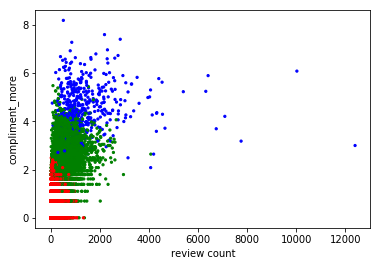

In [275]:
#Based on the covariance and correlation matrix, we will try to plot graph based on attricutes that have high relation between them

#plotting review_count vs compliment_more
plt.scatter(users_df['review_count'], users_df['compliment_more'], c = label_color, s = 5)
plt.xlabel("review count")
plt.ylabel("compliment_more")
plt.show()

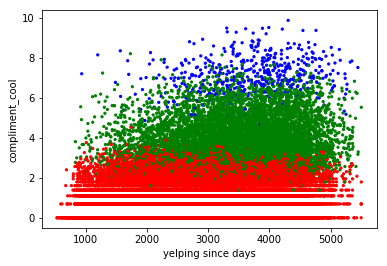

In [276]:
#plotting yelping_since_days vs compliments_cool
plt.scatter(users_df['yelping_since_days'], users_df['compliment_cool'], c = label_color, s = 5)
plt.xlabel("yelping since days")
plt.ylabel("compliment_cool")
plt.show()

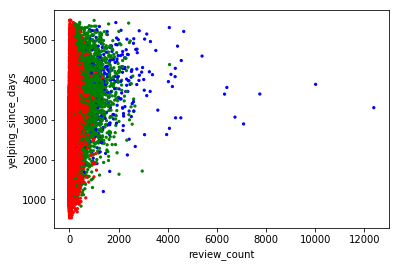

In [277]:
#plotting review_count vs yelping_since_days
plt.scatter(users_df['review_count'], users_df['yelping_since_days'], c = label_color, s = 5)
plt.xlabel("review_count")
plt.ylabel("yelping_since_days")
plt.show()

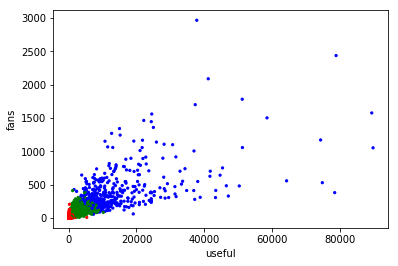

In [278]:
#plotting useful vs fans since their covariance number is high
plt.scatter(users_df['useful'], users_df['fans'], c = label_color, s = 5)
plt.xlabel("useful")
plt.ylabel("fans")
plt.show()

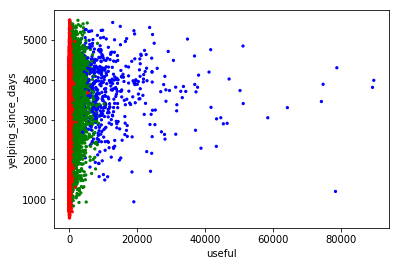

In [279]:
#plotting useful vs yelping_since_days since their covariance number is high
plt.scatter(users_df['useful'], users_df['yelping_since_days'], c = label_color, s = 5)
plt.xlabel("useful")
plt.ylabel("yelping_since_days")
plt.show()

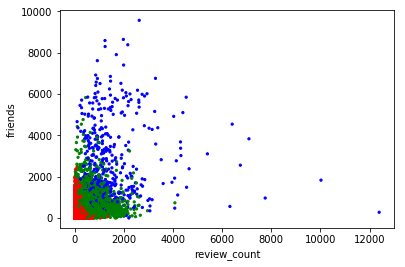

In [280]:
#plotting review_count vs friends since their covariance number is high
plt.scatter(users_df['review_count'], users_df['friends'], c = label_color, s = 5)
plt.xlabel("review_count")
plt.ylabel("friends")
plt.show()

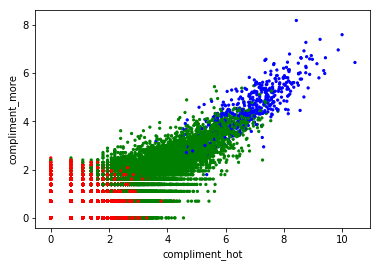

In [281]:
#plotting compliment_hot vs compliment_more since their covariance number is high
plt.scatter(users_df['compliment_hot'], users_df['compliment_more'], c = label_color, s = 5)
plt.xlabel("compliment_hot")
plt.ylabel("compliment_more")
plt.show()

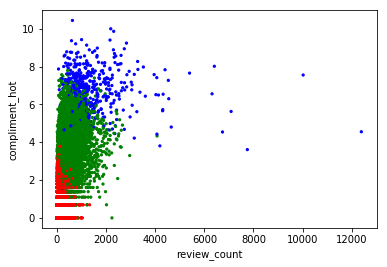

In [282]:
#plotting review_count vs compliment_hot since their covariance number is high
plt.scatter(users_df['review_count'], users_df['compliment_hot'], c = label_color, s = 5)
plt.xlabel("review_count")
plt.ylabel("compliment_hot")
plt.show()

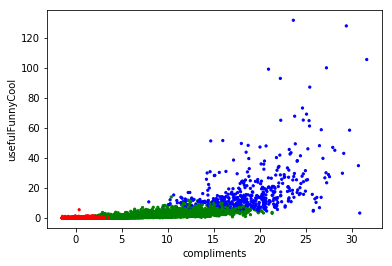

In [283]:
#plotting compliments vs usefulFunnyCool since their covariance number is high
plt.scatter(users_train_df['compliments'], users_train_df['usefulFunnyCool'], c = label_color, s = 5)
plt.xlabel("compliments")
plt.ylabel("usefulFunnyCool")
plt.show()

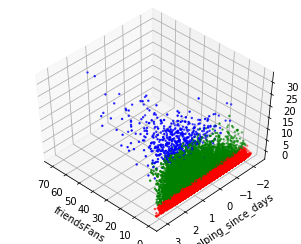

In [284]:
#plotting a 3d graph between friendsFans, yelping_since_days and compliments
fig = plt.figure(figsize=(5.7, 3.2))
ax = Axes3D(fig, rect=[0, 0, 0.7, 1], elev = 48, azim = 134)
sc = ax.scatter(users_train_df['friendsFans'], users_train_df['yelping_since_days'], users_train_df['compliments'], c = label_color, s = 2)
ax.set_xlabel("friendsFans")
ax.set_ylabel("yelping_since_days")
ax.set_zlabel("compliments")
plt.show()

**REPORT**
* Name and explain your clusters according to their centroids. Also report the percentage of each cluster.
> Based on the covariance, correlation matrix and the plotted graphs, we can derive that the good cluster were formed for review_count vs compliments, yelping_since_days vs compliment_cool and review_count vs friends. These attributes explain the data in a useful manner. A user who has high review_count has high compliments and in turn high number of friends.. The 3d graph shows us that compliments, yelping_since_days and compliments are also key atributes. The graph for yelping_since_days and various compliments explains that user that have been using yelp since long have high number of compliments. Thus, the clusters are majorly formed on review_count, compliments, yelping_since_days, friendsFans and usefulFunnyCool attributes. The percentage of each cluster is shown in the following code block.

In [285]:
#Percentage of each cluster
for i in range(numOfClusters):
    print("cluster ", i, ":", (countOfClusters[i] / 100000) * 100, "%")

cluster  0 : 89.959 %
cluster  1 : 0.507 %
cluster  2 : 9.533999999999999 %


* Report any insights that you found.
> We had to take log of the values in compliments column because the data is skewed. The clusters that are formed takes into consideration the important attributes that affects the user dataset. Also, PCA is extremely helpful in reducing the number of dimensions taken into consideration which helps in clustering. We might get different clusters depending on the number of dimensions fed to PCA, number of clusters selected and the number of columns considered during pre-processing.